<h1>Modelos Lineales Mixtos</h1>
<h2> Ejemplo guía #3: Un modelo con dos factores</h2>

Consideremos ahora un experimento en el que cada observación se agrupa según dos factores.En la figura se muestra un diagrama esquemático de dicho diseño.

<img src="figuras/7_fig_factores.png" width="500">

Supongamos que un factor se va a modelar como un efecto fijo y el otro como un efecto aleatorio.
Entonces, un modelo para la k-ésima observación en el nivel $i$ de efecto fijo $A$ y el nivel $j$ de efecto aleatorio $B$ es

$$y_{ijk} = \mu + \alpha_i + b_j + (ab)_{ij} + e_{ijk}$$

donde
* $b_j \sim N(0,\alpha_b^2)$
* $(\alpha b)_{ij} \sim N(0,\sigma_{\alpha \theta}^2)$
* $\epsilon_{ijk} \sim N(0,\sigma^2)$ <br>
y todas las v.a. son mutuamente independientes.<br> <br>
Ademas, $\mu$ es la media poblacional global, $\alpha_i$ son los $I$ efectos fijos para el factor $A$ , y $b_j$ representan los $J$ efectos aleatorios para el factor $B$.<br><br>
Por otro lado, $(\alpha*b)_{ij}$ son las   interacciones.

<h2>Datos</h2>

* El marco de datos Machines, del paquete $nlme$, contiene datos de un experimento industrial que compara 3 tipos de máquinas diferentes

* El objetivo del experimento es determinar qué tipo de máquina daba como resultado la mayor productividad de los trabajadores

* Se seleccionaron al azar 6 trabajadores para participar en la prueba, y cada trabajador operó cada máquina 3 veces (presumiblemente después de un período apropiado de capacitación diseñado para eliminar cualquier "efecto de aprendizaje").

* A continuación se produce el gráfico de resultados: 

In [8]:
library(nlme)
data(Machines)

head(Machines, 20)

,Worker,Machine,score
,<ord>,<fct>,<dbl>
1,1,A,52.0
2,1,A,52.8
3,1,A,53.1
4,2,A,51.8
5,2,A,52.8
6,2,A,53.1
7,3,A,60.0
8,3,A,60.2
9,3,A,58.4


In [13]:
names(Machines)

[1] "Worker"  "Machine" "score"

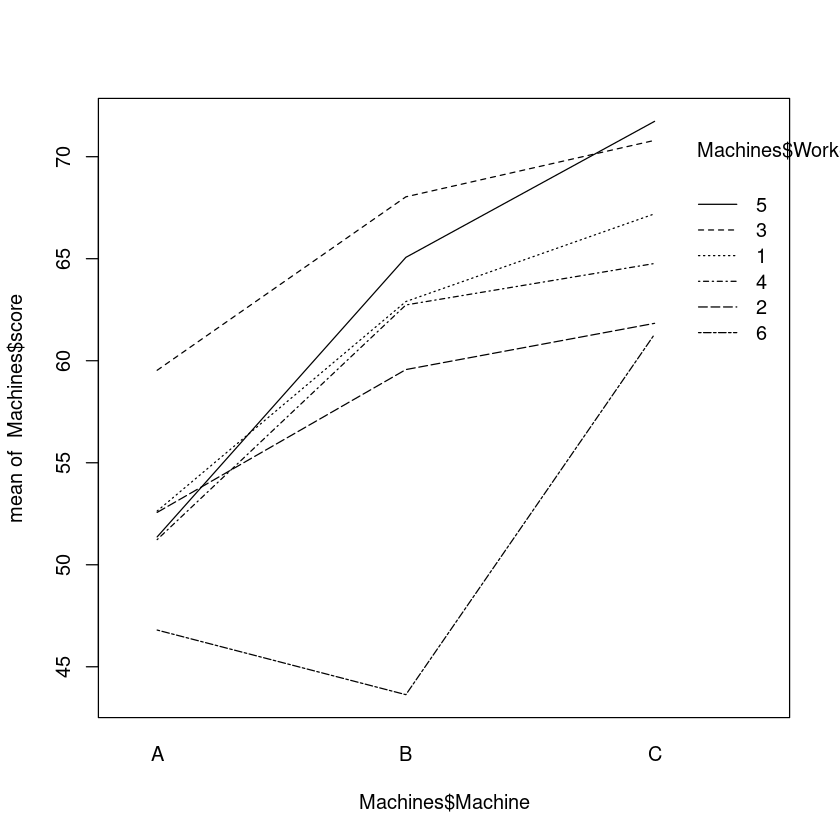

In [16]:
interaction.plot(Machines$Machine,Machines$Worker,Machines$score)

* Si el experimento se repitiera en otro lugar (con diferentes trabajadores), esperaríamos que las estimaciones de los efectos de la máquina fueran bastante cercanas a los resultados obtenidos en el experimento actual, mientras que los efectos de los trabajadores individuales serían bastante diferentes (aunque esperamos que tenga una variabilidad similar)

* Por lo tanto, el modelo (4): $y_{ijk} = \mu + \alpha_i + b_j + (ab)_{ij} + e_{ijk}$ es apropiado, donde  $\alpha_i$ representa los efectos fijos de la máquina, $b_j$  representa los efectos aleatorios del trabajador y  $(\alpha b)_{ij}$ representa la interacción trabajador-máquina (es decir, el hecho de que diferentes trabajadores pueden trabajar mejor en diferentes máquinas).

* Ajustando el modelo completo, podemos probar inmediatamente
* $H_0: \sigma_{\alpha \beta}^2 = 0$

* <i><b>m0 <- lm(score ~ Worker + Machine, Machines)</b>: Este código está ajustando un modelo lineal donde la variable de respuesta es <b>score</b> y las variables predictoras son <b>Worker</b> y <b>Machine</b>. El operador <b>+</b> en la fórmula indica que estás incluyendo ambos <b>Worker</b> y <b>Machine</b> como efectos principales en el modelo. El modelo intentará predecir <b>score</b> en función de <b>Worker</b> y <b>Machine</b> individualmente.</i>


* <i><b>m1 <- lm(score ~ Worker*Machine, Machines)</b>: Este código está ajustando un modelo lineal donde la variable de respuesta es score y las variables predictoras son <b>Worker, Machine, y la interacción entre Worker y Machine.</b> El operador <b>*</b> en la fórmula indica que estás incluyendo Worker y Machine como efectos principales y también su interacción. El modelo intentará predecir score en función de Worker y Machine individualmente, así como la combinación de Worker y Machine.</i>

In [17]:
m0 <- lm(score ~ Worker + Machine, Machines) #worker y machine
m1 <- lm(score ~ Worker*Machine, Machines) #worker y machine e interaccion

In [18]:
anova(m0, m1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,459.81667,NA,NA,NA,NA
2,36,33.28667,10,426.53,46.12982,1.64125e-17


Debemos aceptar $H_1: \sigma_{\alpha \beta}^2 \neq 0$ <br>
Existe evidencia muy sólida de una interacción entre la máquina y el trabajador

Ahora se puede estimar $\sigma^2$: 

In [19]:
summary(m1)$sigma^2

[1] 0.9246296

Para examinar los principales efectos podemos agregar en cada nivel de la interacción

In [25]:
Mach <- aggregate(data.matrix(Machines), by=list(Machines$Worker, Machines$Machine), mean)

#Mach

In [26]:
Mach$Worker <- as.factor(Mach$Worker)
Mach$Machine <- as.factor(Mach$Machine)

Mach

Group.1,Group.2,Worker,Machine,score
<ord>,<fct>,<fct>,<fct>,<dbl>
6,A,1,1,46.80000
2,A,2,1,52.56667
4,A,3,1,51.23333
1,A,4,1,52.63333
3,A,5,1,59.53333
5,A,6,1,51.36667
6,B,1,2,43.63333
2,B,2,2,59.56667
4,B,3,2,62.73333


y ajustar el modelo <br>

$\overline{y}_{ij} = \mu + \alpha_i + b_j + \epsilon_{ij}$ <br>

a los datos resultantes.

* <i>El operador + en la fórmula indica que estás incluyendo ambos Worker y Machine como efectos principales en el modelo. El modelo intentará predecir score en función de Worker y Machine individualmente. </i>

In [28]:
m0 <- lm(score ~ Worker + Machine, Mach)

anova(m0)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Worker,5,413.9650,82.79300,5.823248,0.0089494552
Machine,2,585.0878,292.54389,20.576083,0.0002855485
Residuals,10,142.1767,14.21767,NA,NA


Los valores p muy bajos indican nuevamente que <br>
$H_0: \sigma_b^2 = 0$ y $H_0: \alpha_1 = \alpha_2 = \alpha_3 = 0$ <br>
deben rechazarse en favor de las alternativas obvias

Hay pruebas sólidas de diferencias entre tipos de máquinas y de variabilidad entre trabajadores. <br> <br>
Al examinar las estimaciones de efectos fijos, utilizando métodos estándar de efectos fijos, se indica que la máquina C conduce a un aumento sustancial de la productividad.

In [29]:
summary(m0)


Call:
lm(formula = score ~ Worker + Machine, data = Mach)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6167 -1.3375  0.8056  1.8222  4.1000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   43.283      2.514  17.219 9.23e-09 ***
Worker2        7.411      3.079   2.407  0.03686 *  
Worker3        9.000      3.079   2.923  0.01521 *  
Worker4       10.333      3.079   3.356  0.00729 ** 
Worker5       15.544      3.079   5.049  0.00050 ***
Worker6       12.144      3.079   3.945  0.00275 ** 
Machine2       7.967      2.177   3.660  0.00439 ** 
Machine3      13.917      2.177   6.393 7.91e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.771 on 10 degrees of freedom
Multiple R-squared:  0.8754,	Adjusted R-squared:  0.7882 
F-statistic: 10.04 on 7 and 10 DF,  p-value: 0.0008036


La estimacion de $\sigma_{\alpha b}^2$, la varianza de la interaccion, es sencilla: 

In [30]:
summary(m0)$sigma^2 - (summary(m1)$sigma^2)/3

[1] 13.90946

Agregando una vez más, podemos estimar el componente de la varianza de los trabajadores, $\sigma_{b}^2$:

In [31]:
M <- aggregate(data.matrix(Mach), by=list(Mach$Worker), mean)

In [32]:
m00 <- lm(score ~ 1, M)

In [33]:
summary(m00)$sigma^2 - (summary(m0)$sigma^2)/3

[1] 22.85844